In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time


import jieba
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np 
from collections import Counter

In [2]:
text=""
train = []
PATH = "C:/Users/沈睿朋/Desktop/chromedriver_win32/chromedriver.exe"
driver = webdriver.Chrome(PATH)

driver.get("https://ctee.com.tw/category/news/policy")


#搜尋
# search = driver.find_element_by_name("query")
# search.send_keys("比特幣")
# search.send_keys(Keys.RETURN)
# WebDriverWait(driver, 10).until(EC.presence_of_element_located(
#     (By.CLASS_NAME, "")))

#找標題
title = driver.find_element_by_class_name("post-title")
find_title = title.text
#文章點按進去
link = driver.find_element_by_link_text(find_title)
link.click()
#爬文
inside_text = driver.find_elements_by_class_name("entry-content")
for words in inside_text:
    text+=words.text
print(text)
time.sleep(5)
driver.quit()

C:\Users\沈睿朋\AppData\Local\Temp/ipykernel_5912/764192942.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(PATH)
C:\Users\沈睿朋\AppData\Local\Temp/ipykernel_5912/764192942.py:17: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  title = driver.find_element_by_class_name("post-title")
C:\Users\沈睿朋\AppData\Local\Temp/ipykernel_5912/764192942.py:20: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  link = driver.find_element_by_link_text(find_title)
C:\Users\沈睿朋\AppData\Local\Temp/ipykernel_5912/764192942.py:23: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  inside_text = driver.find_elements_by_class_name("entry-content")


俄烏開戰，工商協進會理事長林伯豐23日指出，在歐美對俄進行經濟制裁下，將衝擊電子產業供應鏈，並引爆全球性的通膨；商總理事長許舒博則相對樂觀的認為，短期內影響不大，但短期定義為二、三個月，若戰事拖過三個月，衝擊將擴大。惟不論俄烏開戰時程長短，工商團體認為，當前國內最重要課題是，「穩定物價」機制與調控要做好，否則很可能會在國內造成另外一波的恐慌性搶購。
俄烏開戰，林伯豐指出，在歐美兩大陣營對俄進行經濟制裁下，原油價格一定會飆漲，各行各業的成本也都跟著上揚，物價自然也是跟著水漲船高，通膨會是免不了的現實。
林伯豐分析指出，美國現在物價正在上漲進行式中，通膨率已逾17％，而美國又依賴俄烏原物料供應，在俄烏開戰後，歐美對俄進行經濟制裁，將導致通膨率往上升，且會是全球性的，「是立即、在短期內就會變成是全球性的通膨。」
林伯豐進一步指出，俄烏戰爭也將衝擊電子產業供應鏈，俄烏是全球鎳、鈀、氖等元素主要的出口國，鎳、鈀、氖等是半導體製程中關鍵元素，俄烏開戰，會為半導體等電子產業的供應鏈帶來一定的衝擊，不過更為主要的因素會是航線會受到戰爭影響，航線不順或斷線，供應鏈也就不順、甚至斷鏈。
然而，許舒博卻相對樂觀認為，廠商都有備料與庫存，短期內影響不大，「我想二、三個月，還不至於造成原物料的短缺。」如果戰事能在二、三個月內結束，對產業供應鏈影響還沒有那麼大，但是，如果戰事拖過三個月，衝擊就會擴大。
許舒博坦言，短期內雖然不至於造成原物料、供應鏈的短缺，但是會受到心理因素的影響造成物價上揚，進一步導致通膨。
許舒博指出，台灣是對外貿易依存度相當高的國家，許多資源包括原物料、特別是工業產品元素，幾乎都仰賴外國，因俄烏開戰而造成國際缺貨時，台灣也一定會遭波及。
許舒博進一步說，在俄烏事件中，美國扮演很關鍵角色，台灣又受美國的影響很深，這可從股市連動中看出，因此，「只要時間不要太長，二、三個月，應該還好。」
而俄烏開戰時程，許舒博樂觀認為，在歐美兩大陣營進行經濟制裁下，應會速戰速決。林伯豐則認為，俄烏戰爭後續，還是要看歐美態度，但終究各國都是以各國利益為優先，但不可能維持現狀。


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\沈睿朋\AppData\Local\Temp\jieba.cache
Loading model cost 0.620 seconds.
Prefix dict has been built successfully.


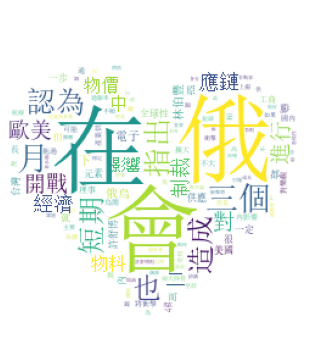

In [3]:
with open("C:/Users/沈睿朋/Desktop/NLP/stopword.txt","r",encoding=("utf-8-sig")) as f:
    stops = f.read().split("\n")

train = []
for t in jieba.cut(text,cut_all=(False)):
    if t not in stops:
        train.append(t)



diction  = Counter(train)

font = "C:/windows/Fonts/simsun.ttc"
mask = np.array(Image.open("C:/Users/沈睿朋/Desktop/heart.jpg"))
wordcloud = WordCloud(background_color="white",mask = mask,
                      font_path = font)
wordcloud.generate_from_frequencies(diction)

plt.figure(figsize = (6,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# wordcloud.to_file("news.png")